# Apple Stock Analysis

In this project I am going to Analyse the $AAPL stock. I will be using `python-datareader` to get the data. I will be using `pandas` for making the data as a Data Frame and `matplotlib`, `seaborn`, `plotly` libraries for plotting purpose.

In [2]:
from IPython.display import HTML
HTML('<img src="https://c.tenor.com/jw92b2HUuTAAAAAC/stonks-stocks.gif">')

# Importing Relevant Libraries

- [pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/) : A python library used to work with financial data like stock prices.
- [pandas](https://pandas.pydata.org/docs/index.html):  A python library used for numerical data analysis
- [datetime](https://docs.python.org/3/library/datetime.html): A python library used to supply classes for manipulating dates and times.

In [2]:
!pip install pandas-datareader
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

     |████████████████████████████████| 109 kB 6.7 MB/s eta 0:00:01


## Downloading the Dataset

Using Pandas-DataReader To Import Apple Stock Price From YahooFinance

In [3]:
df_apple = pdr.get_data_yahoo('AAPL')

AAPL - Ticker Symbol For APPLE (On NASDAQ)

We Have Imported Apple Stock Price Into A Data Frame Named: df_apple

## Data Preparation and Cleaning


**Printing The Data Frame Containing Apple Stock Price**

In [5]:
df_apple

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-28,34.360001,34.174999,34.270000,34.247501,93931600.0,32.335121
2017-03-01,35.037498,34.400002,34.472500,34.947498,145658400.0,32.996017
2017-03-02,35.070000,34.689999,35.000000,34.740002,104844000.0,32.800117
2017-03-03,34.957500,34.647499,34.695000,34.945000,84432400.0,32.993668
2017-03-06,34.942501,34.650002,34.842499,34.834999,87000000.0,32.889816
...,...,...,...,...,...,...
2022-02-18,170.539993,166.190002,169.820007,167.300003,82614200.0,167.300003
2022-02-22,166.690002,162.149994,164.979996,164.320007,91162800.0,164.320007
2022-02-23,166.149994,159.750000,165.539993,160.070007,90009200.0,160.070007


In [6]:
df_apple.shape

(1259, 6)

In [7]:
df_apple.columns

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

- It Has Data Starting From 27 Feb 2017 To 25 Feb 2022 (1260 Rows)
- It Contains 6 Columns: High, Low, Open, Close, Volume, Adj Close

### Checking Missing Data

We can find the missing data using [isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) function of pandas. [isnull()](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) returns a boolean value so we use the [sum()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) function to find the count of missing data

In [8]:
df_apple.isnull().sum()

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

There Is No Missing Data In Our Data Frame

## Exploratory Analysis and Visualization

Let's begin by importing`matplotlib.pyplot` and `seaborn` and `plotly`. These libraries are used for plotting purpose

In [9]:
!pip install plotly
import plotly.graph_objects as go
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Plotting APPLE Stock Price As Line Chart**

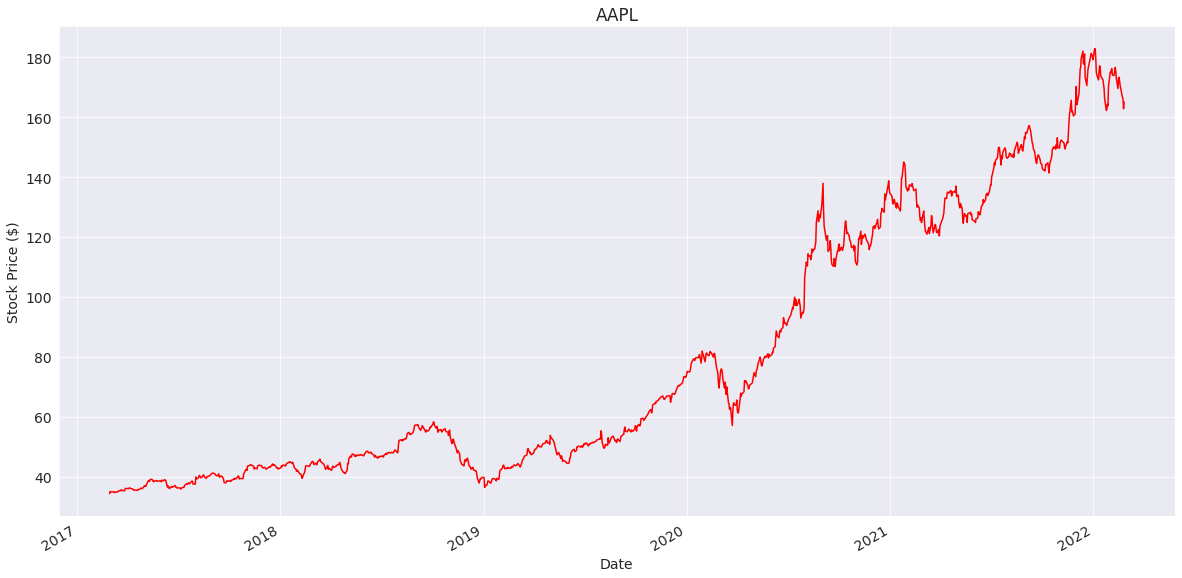

In [10]:
df_apple['High'].plot(figsize=(20,10), color = 'red');
plt.xlabel('Date');
plt.ylabel('Stock Price ($)');
plt.title('AAPL');

We can see that apple is in a bull run post the March 2020 crash. 🚀

**Let's See The Jan - April 2020 Crash Period**

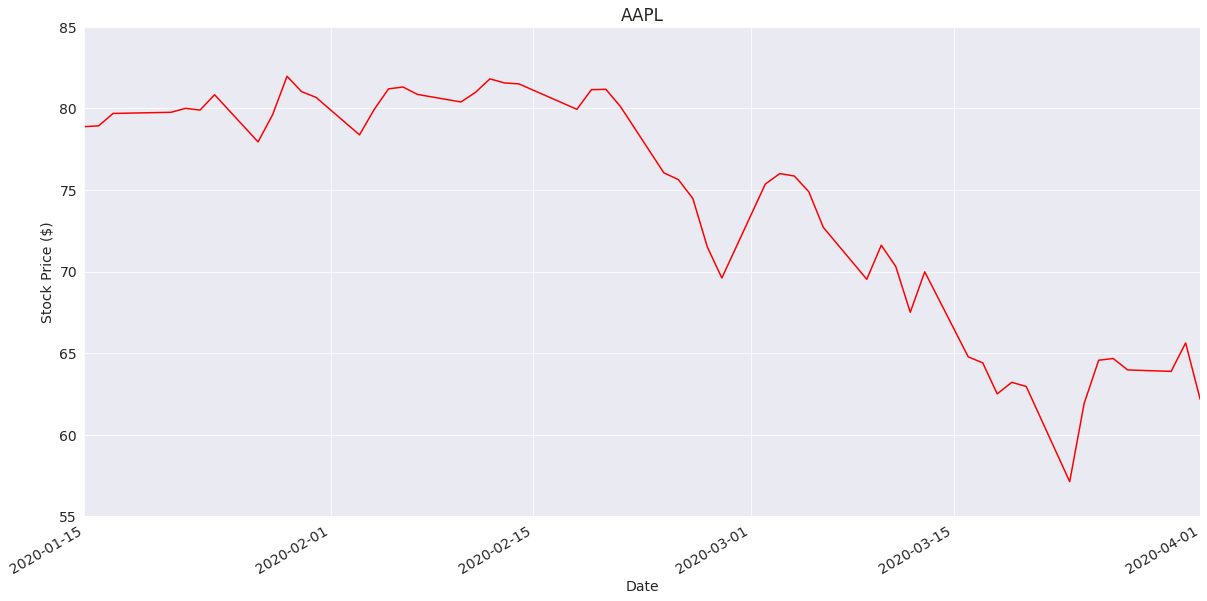

In [11]:
df_apple['High'].plot(xlim=['2020-01-15','2020-04-01'], ylim=[55,85], figsize=(20,10), color = 'red');
plt.xlabel('Date');
plt.ylabel('Stock Price ($)');
plt.title('AAPL');

Now, one can wonder what happened during this period that AAPL stock crashed. Upon googling, one can easily find out that the it was the COVID-19 which led the global markets to bleed.

In [4]:
from IPython.display import HTML
HTML('<img src="https://c.tenor.com/lhey0DPlkiQAAAAC/rage-red-stocks.gif">')

**Let's See The Daily (Close - Open) Price With The Help Of Bar Chart**

In [12]:
priceClose = df_apple['Close']
priceClose = priceClose.loc['2020-02-15':'2020-02-27']

priceOpen = df_apple['Open']
priceOpen = priceOpen.loc['2020-02-15':'2020-02-27']

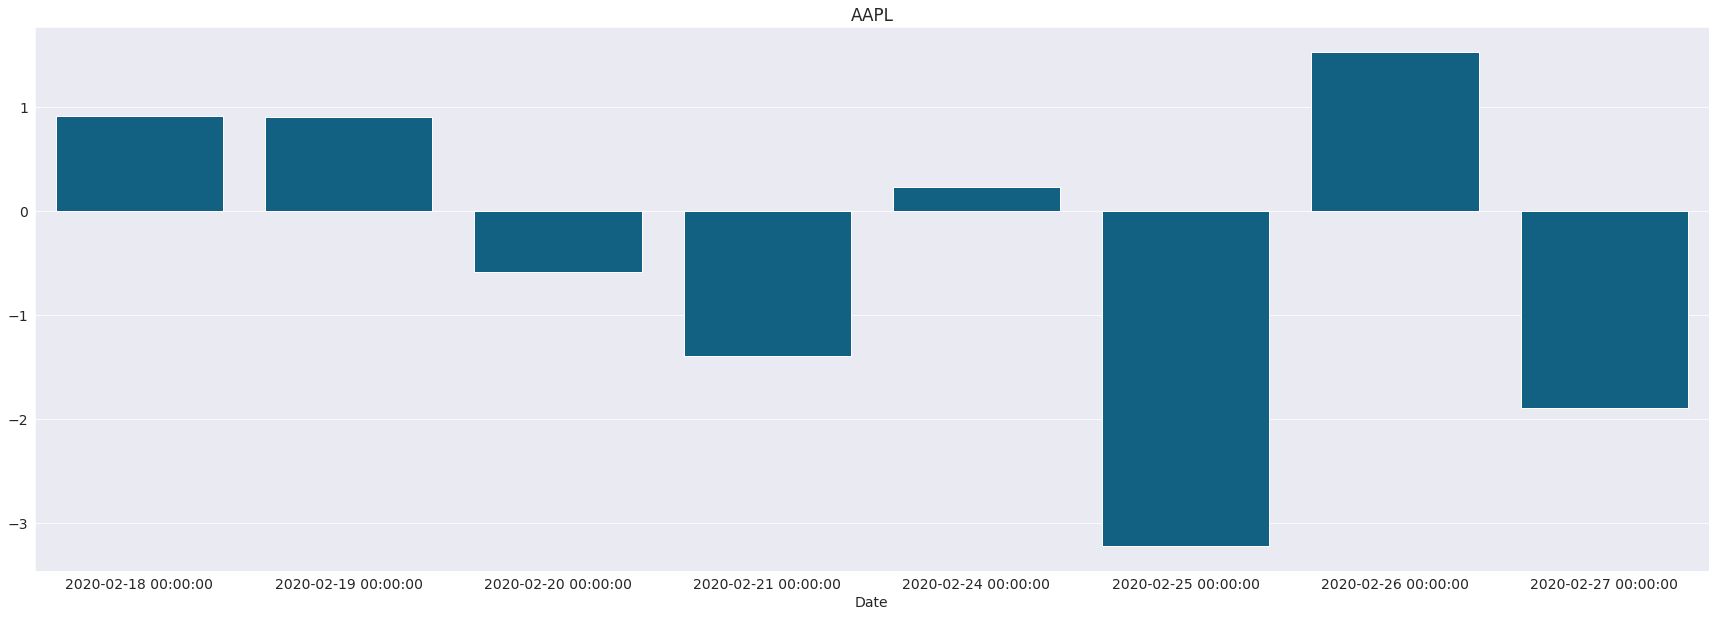

In [13]:
plt.figure(figsize=(30,10));
sns.barplot(x = priceOpen.index, y = priceClose - priceOpen, color = '#006994');
plt.title('AAPL');

**Candlestick Chart**

We can the plotly library to plot candlestick chart

In [94]:
df = df_apple.loc['2020-01-01':'2020-04-01']
fig = go.Figure(
    data=go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
    )
)
fig.show()

## Asking and Answering Questions

#### Q1: When AAPL Rose More Than 5 Points Intraday

In [16]:
df = (df_apple['Close'] - df_apple['Open']) > 5
sum(df)

5

In The Last 5 Years, There Were 5 Instances When $AAPL Rose More Than 5 Points Intraday. Let's Get Those Dates Too

In [65]:
df.where(df).dropna().index

DatetimeIndex(['2020-08-21', '2020-09-21', '2021-11-30', '2021-12-02',
               '2022-02-24'],
              dtype='datetime64[ns]', name='Date', freq=None)

Dates: [2020-08-21, 2020-09-21, 2021-11-30, 2021-12-02, 2022-02-24]

#### Q2: Performance Of AAPL As Compared To SPX

In [29]:
df_spx = pdr.get_data_yahoo('^GSPC')
df_spx['Adj Close'] = df_spx['Adj Close']/69

`AAPL` Trades At `34.36` While `S&P500` Trades At `2367.79` At The Starting Of The DataSet.
So To Find Relative Underperformance/OutPerformance Divided S&P500 Adjusted Close Price By `69` To Have The Same Start

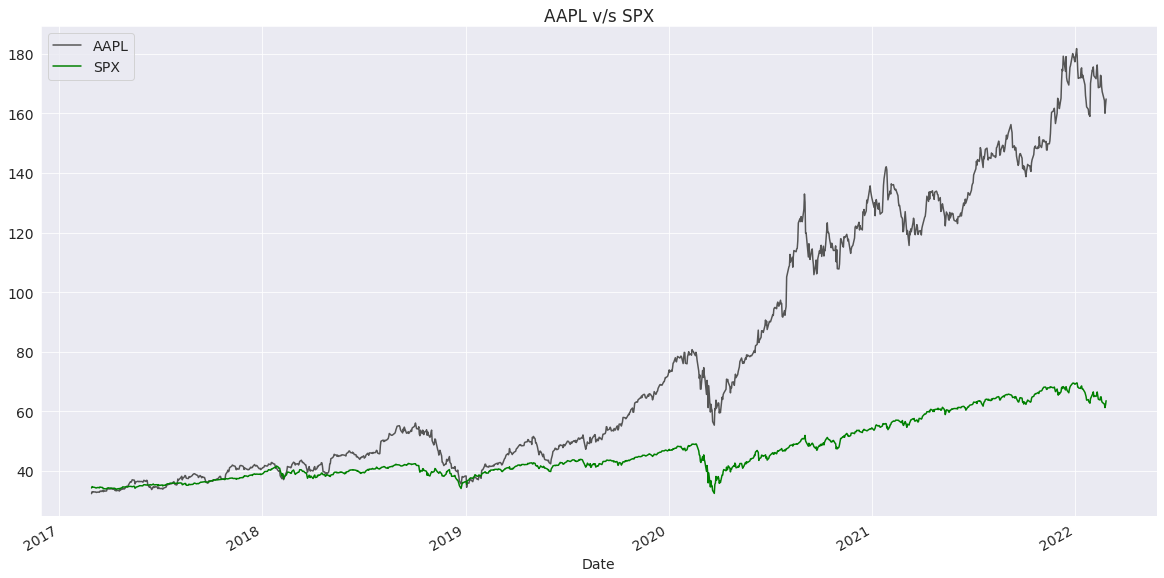

In [63]:
df_apple['Adj Close'].plot(figsize=(20,10), color = '#555555', label = 'AAPL');
df_spx['Adj Close'].plot(figsize=(20,10), color = 'green', label = 'SPX');
plt.xlabel('Date');
plt.title('AAPL v/s SPX');
plt.legend();

$AAPL has hugely outperformed SPX

#### Q3: Best Performing FAANG / MAANG Stock

In [37]:
df_meta = pdr.get_data_yahoo('FB')
df_meta['Adj Close'] = df_meta['Adj Close']/4

df_amzn = pdr.get_data_yahoo('AMZN')
df_amzn['Adj Close'] = df_amzn['Adj Close']/25

df_ntfx = pdr.get_data_yahoo('NFLX')
df_ntfx['Adj Close'] = df_ntfx['Adj Close']/4

df_googl = pdr.get_data_yahoo('GOOGL')
df_googl['Adj Close'] = df_googl['Adj Close']/25

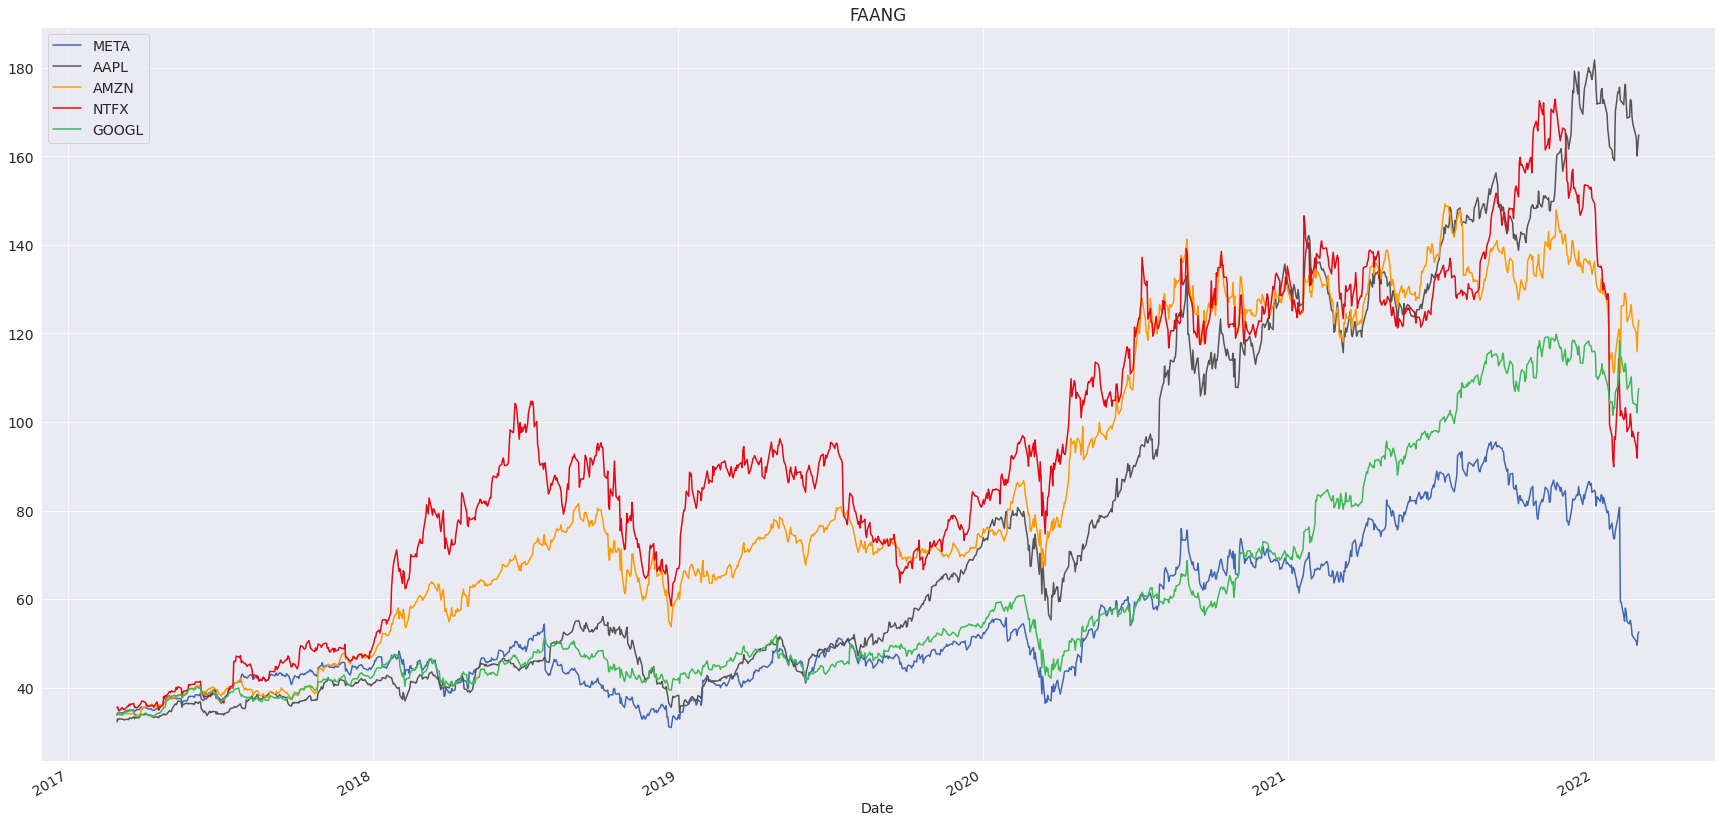

In [50]:
df_meta['Adj Close'].plot(figsize=(30,15), color = '#4267B2', label = 'META');
df_apple['Adj Close'].plot(figsize=(30,15), color = '#555555', label = 'AAPL');
df_amzn['Adj Close'].plot(figsize=(30,15), color = '#FF9900', label = 'AMZN');
df_ntfx['Adj Close'].plot(figsize=(30,15), color = '#E50914', label = 'NTFX');
df_googl['Adj Close'].plot(figsize=(30,15), color = '#3cba54', label = 'GOOGL');

plt.xlabel('Date');
plt.title('FAANG');
plt.legend();

We can conclude that $AAPL is the best performing FAANG stock

#### Q4: What Is The Highest Price Of $AAPL In The Last 5 Years?

In [54]:
df_apple['Close'].max()

182.00999450683594

Apple Has The Highest Price: `$182` In The Last 5 Years. Let's Find The Date Too:

In [58]:
df_apple['Close'].idxmax()

Timestamp('2022-01-03 00:00:00')

$AAPL hit the highest price on: 2022-01-03

#### Q5: When was the best time to buy $AAPL

We can use Moving Averages to make a wise decision

In [89]:
df_apple['20 Day Moving Average (DMA)']= df_apple['Open'].rolling(20).mean()
df_apple['50 Day Moving Average (DMA)']= df_apple['Open'].rolling(50).mean()
df_apple['200 Day Moving Average (DMA)']= df_apple['Open'].rolling(200).mean()

Finding Relation Between Moving Average And Stock Price

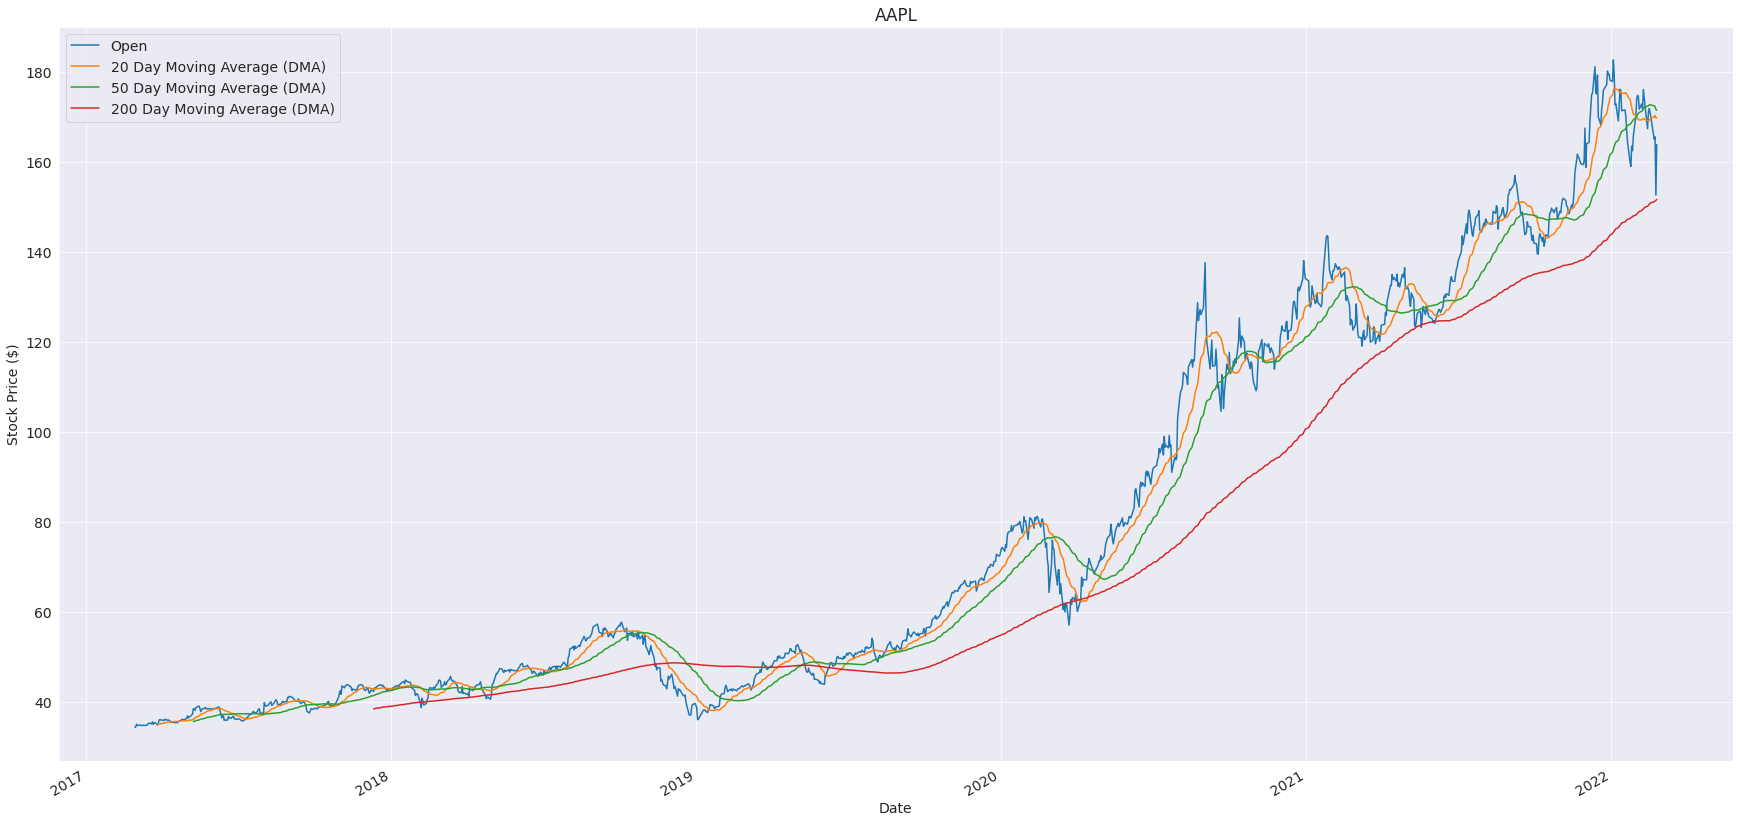

In [91]:
df_apple[['Open','20 Day Moving Average (DMA)','50 Day Moving Average (DMA)','200 Day Moving Average (DMA)']].plot(figsize=(30,15));
plt.xlabel('Date');
plt.ylabel('Stock Price ($)');
plt.title('AAPL');

We Can See In The Above Plot, That Out Of The 3 Moving Averages, Whenever The $AAPL Stock Touched The 200 DMA, It Was A Good Buy.

Disc: This ain't a financial advice

In [6]:
from IPython.display import HTML
HTML('<img src="https://c.tenor.com/DR9xwu7voZ0AAAAC/crypto-crash.gif">')

## Inferences and Conclusion

- Apple has consistently outperformed the broader market i.e. S&P 500
- Apple has also been the best performer out of all the FAANG stocks
- Apple has hit a high of `$182` on 2022-01-03
- If someone wants to #BuyTheDip On $AAPL then 200 DMA is where one can look at.

## References and Future Work

Next, I will start learning Machine Learning And Then Train A Model To Predict Stock Prices